## <center>KNN Assignment(Glass)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">To Build a model for glass classification using KNN.</code>

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data and having a glance at it
glass_data=pd.read_csv("glass.csv")
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### Making necessary EDA for the model

In [3]:
#Checking the rows and columns of the dataset
glass_data.shape

(214, 10)

In [4]:
#Checking the datatypes of the data and checking if any null values are present
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
#Checking for the statistical report of the data
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:xlabel='Type'>

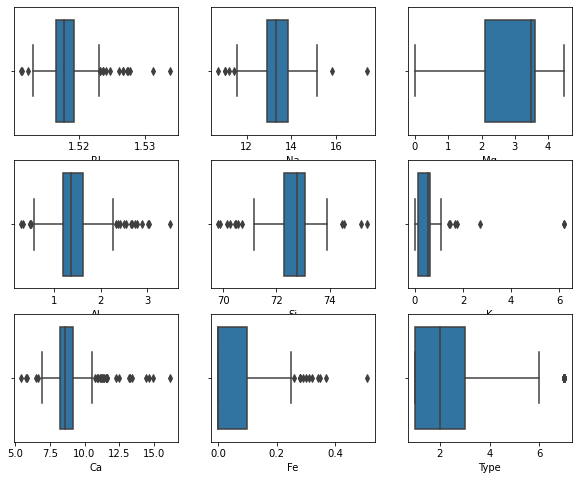

In [6]:
#Checking for the outliers in the data with the help of boxplot
plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
sns.boxplot(glass_data.RI)
plt.subplot(3,3,2)
sns.boxplot(glass_data.Na)
plt.subplot(3,3,3)

sns.boxplot(glass_data.Mg)
plt.subplot(3,3,4)
sns.boxplot(glass_data.Al)
plt.subplot(3,3,5)
sns.boxplot(glass_data.Si)
plt.subplot(3,3,6)

sns.boxplot(glass_data.K)
plt.subplot(3,3,7)
sns.boxplot(glass_data.Ca)
plt.subplot(3,3,8)
sns.boxplot(glass_data.Fe)
plt.subplot(3,3,9)
sns.boxplot(glass_data.Type)

<AxesSubplot:xlabel='Type', ylabel='Density'>

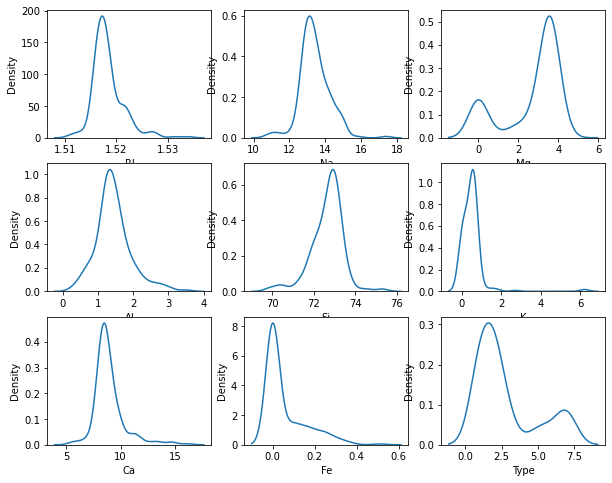

In [7]:
#Checking for the normal distribution of the data with the help of kdeplot
plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
sns.kdeplot(glass_data.RI)
plt.subplot(3,3,2)
sns.kdeplot(glass_data.Na)
plt.subplot(3,3,3)

sns.kdeplot(glass_data.Mg)
plt.subplot(3,3,4)
sns.kdeplot(glass_data.Al)
plt.subplot(3,3,5)
sns.kdeplot(glass_data.Si)
plt.subplot(3,3,6)

sns.kdeplot(glass_data.K)
plt.subplot(3,3,7)
sns.kdeplot(glass_data.Ca)
plt.subplot(3,3,8)
sns.kdeplot(glass_data.Fe)
plt.subplot(3,3,9)

sns.kdeplot(glass_data.Type)

#### Building the KNN Model 
#### <code style="background:salmon;color:black">Building the KNN model and finding the best k value with the help of Grid Search</code>

In [8]:
#Assigning the independent and dependent variable for the train and test process
x=glass_data.iloc[:,0:9]
y=glass_data.iloc[:,9]

In [9]:
#In order to avoid variance between the attributes of the dataset standardizing the data
scale=preprocessing.StandardScaler()
x=scale.fit_transform(x)

In [10]:
#Splitting the data into train and test with 20% data for testing and 80% for training
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [11]:
#Building a KNN Model with 4 neighbors 
model1=KNeighborsClassifier(n_neighbors=4)
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [12]:
#Predicting the built model on test dataset and cjhecking its accuracy
y_pred=model1.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6744186046511628

In [13]:
#Finding the best neighbor value for the model in the range 1-40
model=KNeighborsClassifier()
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [14]:
#Finding the best parameters for the KNN model with the help of Gridsearch
gsv=GridSearchCV(model,param_grid=param_grid)
gsv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [15]:
#checking the neighbor value and the accuracy
print((gsv.best_params_),(gsv.best_score_))

{'n_neighbors': 4} 0.7307563025210084


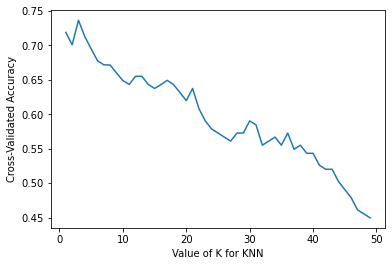

In [16]:
#Plotting and visualizing the model for diff K values with respect to accuarcy
k_range = range(1,50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Insights drawn:
>From the built KNN model above its clear that the k=4 gives the better accuracy and also from the above visualization accuracy is almost high at around k=4.